<div style="background-color: lightgreen; padding: 18px;">
    <h1> Projeto| Estatística I
</div>

### Esse projeto visa a aplicação dos conceitos e ferramental da Estatística desenvolvidos nesse módulo

#### Para o desenvolvimento das atividades abaixo, o seu grupo pode escolher qualquer dataset que contenha uma coluna com valores inteiros.

In [4]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random

__1) Em algum dataset, classifique as suas colunas em Quantitativa Discreta, Quantitiva Contínua, Qualitativa Ordinal ou Qualitativa Nominal.__


In [5]:
fiis = pd.read_csv('./fii.csv', sep=';')

fiis.head()

,Unnamed: 0,Codigo,Nome,Preco R$,VolumeMedio,DividendYield %,PatrimonioLiq R$,P/VP,Cotas,Segmento,Valorizacao12Meses
0,ABCP11,ABCP11,FDO INV IMOB GRAND PLAZA SHOPPING,"99,78",4.519,"0,44",910.000,"1,35",1.000.000,Shoppings,0.15
1,AEFI11,AEFI11,AESAPAR FDO INV IMOB - FII,"174,90",2.065,"0,71",110.000,"1,15",752.500,Outros,0.03
2,AGCX11,AGCX11,FDO INV IMOB AGÊNCIAS CAIXA - FII,"1.235,50",240.000,"0,69",430.000,"1,16",405.000,Outros,0.00
3,ALZR11,ALZR11,ALIANZA TRUST RENDA IMOBILIARIA FDO INV IMOB,"97,50",3.435,"0,69",97.000,"1,00",997.042,Outros,0.02
4,BBFI11B,BBFI11B,BB FDO INV IMOB PROGRESSIVO,"2.388,00",144.000,"1,04",400.000,"0,78",130.000,Lajes Corporativas,0.14


In [6]:

Dataset = pd.DataFrame(columns=fiis.columns)

for coluna in fiis.columns:
    tipo_dado = fiis[coluna].dtype
    unique_values = fiis[coluna].nunique()

    if tipo_dado in ['int64', 'float64']:
        if unique_values <= 10:
            Dataset.loc[0, coluna] = 'Quantitativa Discreta'
        else:
            Dataset.loc[0, coluna] = 'Quantitativa Contínua'
    else:
        if unique_values <= 10:
            Dataset.loc[0, coluna] = 'Qualitativa Nominal'
        else:
            Dataset.loc[0, coluna] = 'Qualitativa Ordinal'

Dataset

,Unnamed: 0,Codigo,Nome,Preco R$,VolumeMedio,DividendYield %,PatrimonioLiq R$,P/VP,Cotas,Segmento,Valorizacao12Meses
0,Qualitativa Ordinal,Qualitativa Ordinal,Qualitativa Ordinal,Qualitativa Ordinal,Quantitativa Contínua,Qualitativa Ordinal,Qualitativa Ordinal,Qualitativa Ordinal,Qualitativa Ordinal,Qualitativa Nominal,Quantitativa Contínua


__2) Com o mesmo dataset, construir a distribuição de probabilidade de uma feature com valores inteiros. Escrever uma função para calcular a Esperança e outra função para calcular a Variância dessa variável aleatória. Compare o resultado de sua função com os resultados de alguma nativa do Python (há muitos módulos/bibliotecas que calculam esses parâmetros). Calcule a Esperança e a Variância da variável aleatória da distribuição de probabilidade. Construa uma função que faça o papel da cdf() e outra função com o papel da sf(). Desafio extra: construir funções que fazem o papel da ppf() e da isf() .__'.f'.

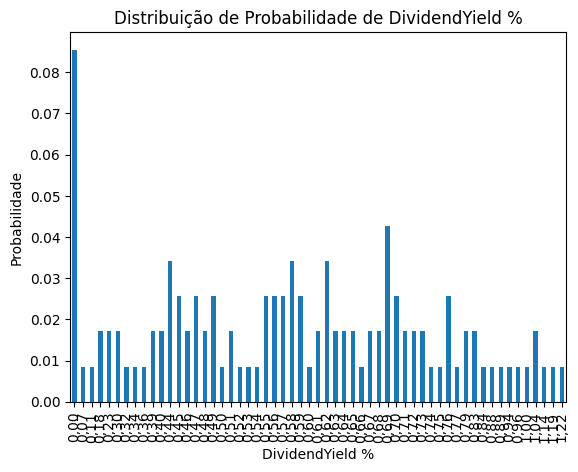

In [7]:

def distribuicao_probabilidade(coluna):
    valores = fiis[coluna].value_counts(normalize=True)
    valores = valores.sort_index()
    valores.plot(kind='bar')
    plt.xlabel(coluna)
    plt.ylabel('Probabilidade')
    plt.title('Distribuição de Probabilidade de ' + coluna)
    plt.show()

distribuicao_probabilidade('DividendYield %')

In [8]:
def calc_esperanca(coluna):
    valores = fiis[coluna].value_counts(normalize=True)
    esperanca = 0
    for idx, val in valores.items():
        idx_numeric = float(idx.replace(',', '.')) 
        esperanca += idx_numeric * val
    return esperanca



print('à responsta da da função é: ', calc_esperanca('DividendYield %'))

valores = fiis['DividendYield %'].str.replace(',', '.').astype(float)

esperanca = valores.mean()

print('a esperança é: ', esperanca)


def variancia(coluna):
    valores = fiis[coluna].value_counts(normalize=True)
    variancia = 0
    for idx, val in valores.items():
        idx_numeric = float(idx.replace(',', '.')) 
        variancia += (idx_numeric - esperanca) ** 2 * val
    return variancia

variancia = variancia('DividendYield %')

print('a variância é: ', variancia)

à responsta da da função é:  0.5521367521367522
a esperança é:  0.5521367521367522
a variância é:  0.06813645993133173


In [9]:

def cdf(x, data):
    return (data <= x).mean()

def sf(x, data):
    return (data > x).mean()

print('o cdf de 1% é: ', cdf(1, valores))
print('o sf de 1% é: ', sf(1, valores))  

o cdf de 1% é:  0.9491525423728814
o sf de 1% é:  0.0423728813559322


 __3) Utilizando a variável aleatória do exercício anterior, construir a distribuição das médias amostrais para ilustrar/comprovar o Teorema do Limite Central. Comparar a média e a variância com o exercício anterior. Utilizar o teste de normalidade para verificar se essa distribuição (das médias amostrais) é normal ou  não.__


variancia  0.06813645993133173
esperanca  0.5521367521367522
medias_amostrais  [0.0240625, 0.0, 0.0153125, 0.0225, 0.0228125, 0.0215625, 0.0125, 0.015, 0.005625, 0.018125, 0.0246875, 0.0178125, 0.018125, 0.010625, 0.0125, 0.0325, 0.005625, 0.0, 0.01375, 0.0159375, 0.0246875, 0.01125, 0.0259375, 0.0275, 0.02375, 0.02125, 0.0159375, 0.0, 0.02, 0.02125, 0.01375, 0.0184375]
média amostral:  0.016650390625
variância amostral:  6.392354965209962e-05
NormaltestResult(statistic=1.8336846415771104, pvalue=0.39977942527311955)


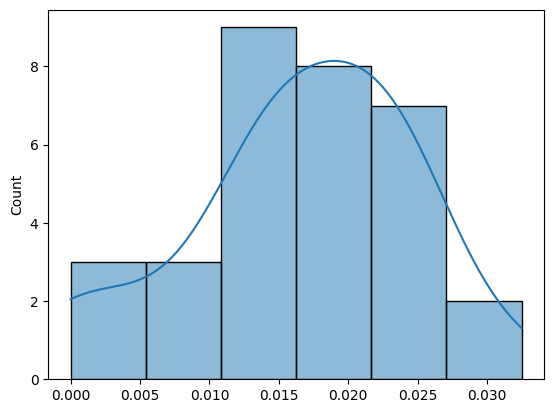

In [10]:

print('variancia ', variancia)
print('esperanca ', esperanca)

# Utilizando a variável aleatória do exercício anterior, construir a distribuição das médias amostrais usando nunpy para ilustrar/comprovar o Teorema do Limite Central. Comparar a média e a variância com o exercício anterior. Utilizar o teste de normalidade para verificar se essa distribuição (das médias amostrais) é normal ou  não.__

medias_amostrais = []
amostra = random.choices(valores, k=32)
for i in range(32):
    medias_amostrais.append(amostra[i]/ 32)

print("medias_amostrais ", medias_amostrais)
   

medias_amostrais = np.array(medias_amostrais)

sns.histplot(medias_amostrais, kde=True)

media_amostral = medias_amostrais.mean()

variancia_amostral = medias_amostrais.var()

print('média amostral: ', media_amostral)

print('variância amostral: ', variancia_amostral)

print(stats.normaltest(medias_amostrais))






In [11]:

_, p = stats.normaltest(medias_amostrais)


if p > 0.05:
    print('a distribuição das médias amostrais é normal')
if p <= 0.05:
    print('a distribuição das médias amostrais não é normal')

a distribuição das médias amostrais é normal


__4) No exercício anterior, construir o intervalo de confiança para a média, com nível de confiança de 95% e erro percentual de 2% (para cima ou para baixo).__

In [12]:
from scipy.stats import norm


novas_medias = random.choices(valores, k=100)

n = len(medias_amostrais)
uo = valores.mean()

alpha = 0.05
Zc = norm.isf(alpha/2)



print('novas_medias ', novas_medias)
print('uo ', uo)
media = pd.Series(novas_medias).mean()
desvio_padrao = medias_amostrais.std()
z = 1.96

inferior = media - Zc * desvio_padrao / n ** .5

superior = media + Zc * desvio_padrao / n ** .5

erro_percentual =  ((media - uo) / uo) * 100

print('média: ', media)

print('intervalo de confiança: ', inferior, superior)

print('o erro percentual é ', erro_percentual)  





novas_medias  [0.56, 0.45, 0.53, 0.11, 0.7, 0.0, 0.0, 0.58, 0.89, 0.68, 0.52, 0.11, 0.59, 0.58, 0.7, 0.0, 0.76, 0.44, 0.18, 0.0, 0.76, 0.89, 0.76, 1.0, 0.58, 0.45, 0.34, 0.63, 0.48, 0.7, 0.0, 0.74, 0.69, 0.58, 0.7, 0.46, 0.11, 0.71, 0.69, 0.45, 0.68, 0.77, 0.67, 0.23, 0.0, 0.59, 0.61, 0.44, 1.19, 0.62, 0.0, 0.0, 0.83, 0.67, 0.11, 0.5, 0.07, 0.39, 0.59, 0.74, 0.73, 0.58, 0.65, 0.7, 0.69, 0.0, 0.48, 0.66, 0.56, 0.58, 0.65, 1.22, 0.0, 0.44, 0.77, 0.0, 0.55, 0.49, 0.0, 0.45, 0.54, 0.63, 0.39, 0.73, 0.7, 0.84, 0.62, 0.63, 0.49, 0.11, 0.69, 0.4, 0.62, 1.22, nan, 0.79, 0.49, 0.69, 0.07, 0.63]
uo  0.5521367521367522
média:  0.517979797979798
intervalo de confiança:  0.5152096463387482 0.5207499496208478
o erro percentual é  -6.186321418519566


__5) Se uma amostra de tamanho 30, vinda da variável aleatória do exercício 2), tiver uma média 10% maior que a média da população, a hipótese de que essas médias são iguais seria rejeitada ou não rejeitada, com um nível de confiança de 95%? (faça o teste de hipótese para responder essa pergunta. Utilize os desvio padrão populacional).__


In [13]:
amostra_30valores = random.choices(valores, k=30)
media_30Valores = pd.Series(amostra_30valores).mean()

print('media 30 valores', media_30Valores)
print('uo', uo)

n = 30
alpha = 0.05
Zc = norm.isf(alpha/2)
media = pd.Series(amostra_30valores).mean()
desvio_padrao = valores.std()
z = 1.96

inferior = media - Zc * desvio_padrao / n ** .5
superior = media + Zc * desvio_padrao / n ** .5

print('intervalo de confiança: ', inferior, superior)

if(uo >= inferior and uo <= superior): # se a média da população está dentro do intervalo de confiança da amostra
    print('Hipotese não rejeitada')
else:
    print('Hipotese rejeitada')




media 30 valores 0.5906666666666668
uo 0.5521367521367522
intervalo de confiança:  0.4968583845735238 0.6844749487598097
Hipotese não rejeitada
